In [1]:
import mysql.connector
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

try:
    # Connexion à la base de données MySQL
    conn = mysql.connector.connect(
        host='mysql-hackathonmia12.alwaysdata.net',
        user='360826',
        password='Ipssi12*',
        database='hackathonmia12_olympicgames2024'
    )

    if conn.is_connected():
        print("Connexion à la base de données MySQL réussie")
        
        cursor = conn.cursor()

        olympic_medals = pd.read_sql_query('Select * from olympic_medals;', conn)
        olympic_hosts = pd.read_sql_query('Select * from olympic_hosts;', conn)
        olympic_athlete = pd.read_sql_query('Select * from olympic_athletes;', conn)
        olympic_results = pd.read_sql_query('Select * from olympic_results;', conn)
    
except mysql.connector.Error as error:
    print(f"Erreur lors de la connexion à MySQL: {error}")

Connexion à la base de données MySQL réussie


/var/folders/pt/bjbrsqsx6k5fbdjs10hrp5280000gn/T/ipykernel_72612/1041293145.py:22: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  olympic_medals = pd.read_sql_query('Select * from olympic_medals;', conn)
/var/folders/pt/bjbrsqsx6k5fbdjs10hrp5280000gn/T/ipykernel_72612/1041293145.py:23: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  olympic_hosts = pd.read_sql_query('Select * from olympic_hosts;', conn)
/var/folders/pt/bjbrsqsx6k5fbdjs10hrp5280000gn/T/ipykernel_72612/1041293145.py:24: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy

# Nombre de JO organisés par pays

In [2]:
olympic_hosts['game_location'].unique()
country_replace = {'Russian Federation': 'Russia', 'USSR': 'Russia', 'Federal Republic of Germany': 'Germany', 'Australia, Sweden': 'Australia', 'Yugoslavia': 'Bosnia and Herzegovina'}
olympic_hosts['game_location'] = olympic_hosts['game_location'].replace(country_replace)
olympic_hosts['game_location'].value_counts()

game_location
United States             8
France                    5
Japan                     4
Germany                   3
Canada                    3
Italy                     3
Great Britain             3
Norway                    2
Switzerland               2
Republic of Korea         2
Russia                    2
Australia                 2
Austria                   2
China                     2
Greece                    2
Netherlands               1
Finland                   1
game_location             1
Mexico                    1
Spain                     1
Brazil                    1
Bosnia and Herzegovina    1
Belgium                   1
Sweden                    1
Name: count, dtype: int64

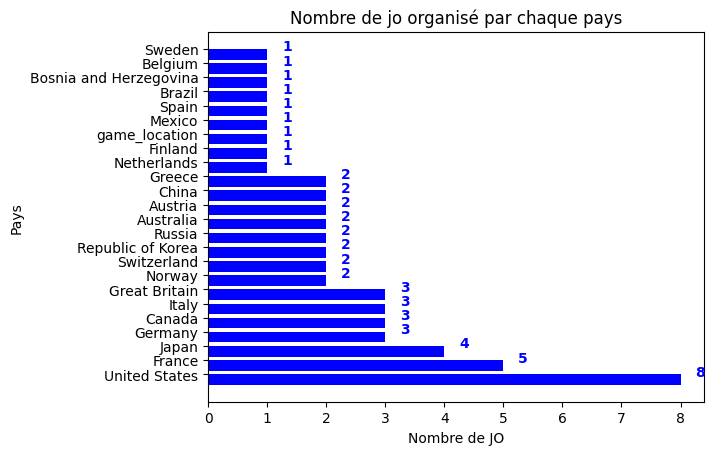

In [3]:
a = olympic_hosts['game_location'].value_counts()

x = list(a.index)
y = list(a)

fig, ax = plt.subplots()    
width = 0.75 # the width of the bars 
ind = np.arange(len(y))  # the x locations for the groups
ax.barh(ind, y, width, color="blue")
ax.set_yticks(ind+width/2)
ax.set_yticklabels(x, minor=False)
for i, v in enumerate(y):
    ax.text(v + .25, i + .25, str(v), color='blue', fontweight='bold') #add value labels into bar
plt.title('Nombre de jo organisé par chaque pays')
plt.xlabel('Nombre de JO')
plt.ylabel('Pays')
plt.show()

In [4]:
clean_olympic_medals = olympic_medals[['discipline_title','slug_game', 'event_gender', 'medal_type', 'participant_type', 'athlete_full_name', 'country_name']]
check_medal_country = clean_olympic_medals.groupby(['country_name', 'medal_type']).size().unstack(fill_value=0)
check_medal_france = clean_olympic_medals[clean_olympic_medals['country_name'] == 'France']
check_medal_france[['city', 'game_year']] = check_medal_france['slug_game'].str.extract(r'^(.*)-(\d{4})$')
check_medal_france['game_year'] = check_medal_france['game_year'].astype(int)
count_medal_france = check_medal_france['medal_type'].value_counts()

/var/folders/pt/bjbrsqsx6k5fbdjs10hrp5280000gn/T/ipykernel_72612/2585927069.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check_medal_france[['city', 'game_year']] = check_medal_france['slug_game'].str.extract(r'^(.*)-(\d{4})$')
/var/folders/pt/bjbrsqsx6k5fbdjs10hrp5280000gn/T/ipykernel_72612/2585927069.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  check_medal_france[['city', 'game_year']] = check_medal_france['slug_game'].str.extract(r'^(.*)-(\d{4})$')
/var/folders/pt/bjbrsqsx6k5fbdjs10hrp52800

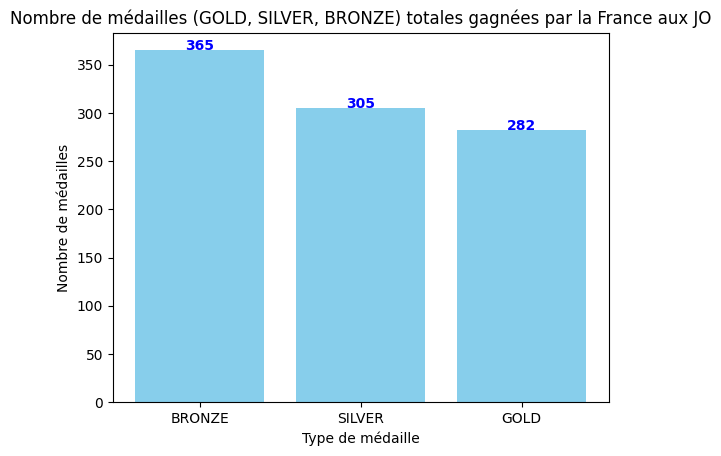

In [5]:
count_medal_france = check_medal_france['medal_type'].value_counts()

x = list(count_medal_france.index)  # Types de médailles (GOLD, SILVER, BRONZE)
y = list(count_medal_france)        # Nombre de médailles

fig, ax = plt.subplots()

ax.bar(x, y, color="skyblue")

plt.title('Nombre de médailles (GOLD, SILVER, BRONZE) totales gagnées par la France aux JO')
plt.xlabel('Type de médaille')
plt.ylabel('Nombre de médailles')

for i, v in enumerate(y):
    ax.text(i, v + 0.5, str(v), ha='center', color='blue', fontweight='bold')

plt.show()

# Graphique des médailles gagnées par la France pour chaque JO

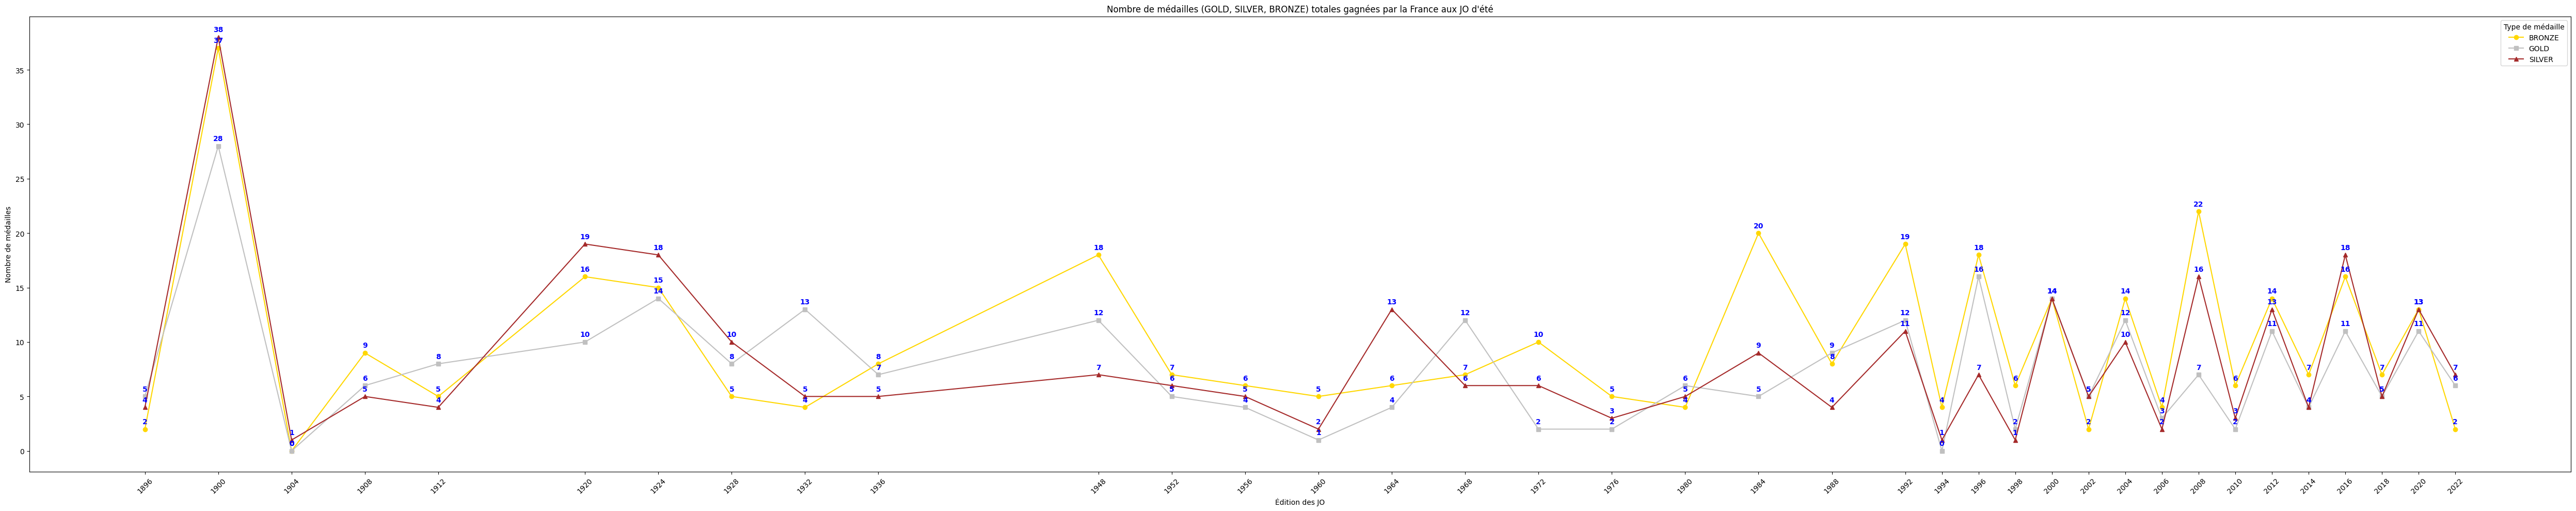

In [6]:
check_medal_france = check_medal_france.sort_values('game_year')

# Groupez les données par édition des JO (slug_game) et type de médaille (medal_type)
grouped_data = check_medal_france.groupby(['game_year', 'medal_type']).size().unstack(fill_value=0)

# Configuration des étiquettes et des types de médailles
labels = grouped_data.index
medal_types = grouped_data.columns

fig, ax = plt.subplots(figsize=(50, 10))

colors = ['gold', 'silver', 'brown']
markers = ['o', 's', '^']

# Création des lignes pour chaque type de médaille
for i, medal in enumerate(medal_types):
    ax.plot(labels, grouped_data[medal], label=medal, color=colors[i], marker=markers[i])

# Titres et étiquettes
ax.set_title('Nombre de médailles (GOLD, SILVER, BRONZE) totales gagnées par la France aux JO d\'été')
ax.set_xlabel('Édition des JO')
ax.set_ylabel('Nombre de médailles')
ax.set_xticks(labels)
ax.set_xticklabels(labels, rotation=45)  # Format des dates en années

ax.legend(title='Type de médaille')

# Ajout des annotations pour chaque point de donnée
for i, medal in enumerate(medal_types):
    for j in range(len(labels)):
        ax.text(labels[j], grouped_data[medal].iloc[j] + 0.5, str(grouped_data[medal].iloc[j]), ha='center', color='blue', fontweight='bold')

plt.tight_layout()
plt.show()

In [7]:
olympic_medals = olympic_medals.rename({'slug_game':'game_slug'},axis=1)
olympic_results = olympic_results.rename({'slug_game':'game_slug'},axis=1)

# Lors des JO de Rio en 2016, combien de pays et d'athlètes ont participé à la compétition ? ainsi que le nombre de sports et d'épreuves qui ont étés organisés ?

In [8]:
rio_2016 = olympic_results[olympic_results['game_slug'] == 'rio-2016']

total_athletes = rio_2016['athlete_full_name'].nunique()

total_countries = rio_2016['country_name'].nunique()

total_sports = rio_2016['discipline_title'].nunique()

total_events = rio_2016['event_title'].nunique()

print(f"Nombre total d'athlètes : {total_athletes}")
print(f"Nombre total de pays participants : {total_countries}")
print(f"Nombre total de sports représentés : {total_sports}")
print(f"Nombre total d'épreuves : {total_events}")

Nombre total d'athlètes : 5739
Nombre total de pays participants : 199
Nombre total de sports représentés : 32
Nombre total d'épreuves : 214


# Lors de quel JO la France a eu le plus (le moins) de succès ?

In [9]:
france_medals = olympic_results[olympic_results['country_name'] == 'France']

medal_counts = france_medals.groupby('game_slug').size()

least_successful_jo = medal_counts.idxmin()
least_successful_medal_count = medal_counts.min()

print(f"Jeux Olympiques les moins réussis pour la France: {least_successful_jo} avec {least_successful_medal_count} médaille(s)")


Jeux Olympiques les moins réussis pour la France: lake-placid-1932 avec 6 médaille(s)


# Quelles sont les sports les plus dominants dans les JO ?

In [10]:
sport_medal_counts = clean_olympic_medals.groupby('discipline_title').size().sort_values(ascending=False)

print(sport_medal_counts.head(10))

discipline_title
Athletics              3080
Swimming               1763
Wrestling              1356
Rowing                 1072
Boxing                  996
Gymnastics Artistic     979
Shooting                871
Canoe Sprint            799
Sailing                 771
Weightlifting           679
dtype: int64


# Joueur ayant gagné le plus de médaille

In [11]:
olympic_athlete['medal_gold'] = 0
olympic_athlete['medal_silver'] = 0
olympic_athlete['medal_bronze'] = 0
def parse_medals(medal_str):
    if pd.isna(medal_str):
        return 0, 0, 0
    gold = silver = bronze = 0

    medals = [medal for medal in medal_str.split('\n') if medal.strip()]
    for i in range(0, len(medals), 2):
        count = int(medals[i])
        type_medal = medals[i+1]
        if type_medal == 'G':
            gold += count
        elif type_medal == 'S':
            silver += count
        elif type_medal == 'B':
            bronze += count
    return gold, silver, bronze

for index, row in olympic_athlete.iterrows():
    gold, silver, bronze = parse_medals(row['athlete_medals'])
    olympic_athlete.at[index, 'medal_gold'] = gold
    olympic_athlete.at[index, 'medal_silver'] = silver
    olympic_athlete.at[index, 'medal_bronze'] = bronze

    
pd.set_option('display.max_rows', 50)
#print(athletes_df.head())   
display(olympic_athlete.head(5)) 
olympic_athlete['total_medals'] = olympic_athlete['medal_gold'] + olympic_athlete['medal_silver'] + olympic_athlete['medal_bronze']

,athlete_url,athlete_full_name,games_participations,first_game,athlete_year_birth,athlete_medals,bio,medal_gold,medal_silver,medal_bronze
0,https://olympics.com/en/athletes/a-aziz-hassan...,A-Aziz Hassan JALOOF,2,Barcelona 1992,1973.0,,,0,0,0
1,https://olympics.com/en/athletes/a-baser-wasiqi,A Baser WASIQI,1,Atlanta 1996,1975.0,,\n\n\nPersonal Best: Mar – unknown.\n\n\n\n\n\n,0,0,0
2,https://olympics.com/en/athletes/a-darnis,A. DARNIS,1,Paris 1900,0.0,,,0,0,0
3,https://olympics.com/en/athletes/a-germaine-go...,A. Germaine GOLDING,1,Paris 1924,1887.0,,\n\n\nGermaine Golding was a top French player...,0,0,0
4,https://olympics.com/en/athletes/a-j-hurt,A J HURT,1,Beijing 2022,2000.0,,,0,0,0


In [12]:
best_athletes = olympic_athlete.sort_values(by='total_medals', ascending=False).head(1)

columns_to_display = ['athlete_full_name', 'total_medals', 'medal_gold', 'medal_silver', 'medal_bronze']
print(best_athletes[columns_to_display])

      athlete_full_name  total_medals  medal_gold  medal_silver  medal_bronze
49044    Michael PHELPS            28          23             3             2


# JO de Paris, en 1900 : les femmes peuvent participer aux JO ?

In [13]:
olympic_medals.head(10)

,id,discipline_title,game_slug,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code
0,1,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/amos-mosaner,Amos MOSANER,Italy,IT,ITA
1,2,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/kristin-skaslien,Kristin SKASLIEN,Norway,NO,NOR
2,3,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/magnus-nedreg...,Magnus NEDREGOTTEN,Norway,NO,NOR
3,4,Curling,beijing-2022,Mixed Doubles,Mixed,BRONZE,GameTeam,Sweden,https://olympics.com/en/athletes/almida-de-val,Almida DE VAL,Sweden,SE,SWE
4,5,Curling,beijing-2022,Mixed Doubles,Mixed,BRONZE,GameTeam,Sweden,https://olympics.com/en/athletes/oskar-eriksson,Oskar ERIKSSON,Sweden,SE,SWE
5,6,Curling,beijing-2022,Women,Women,GOLD,GameTeam,Great Britain,,,Great Britain,GB,GBR
6,7,Curling,beijing-2022,Women,Women,SILVER,GameTeam,Japan,,,Japan,JP,JPN
7,8,Curling,beijing-2022,Women,Women,BRONZE,GameTeam,Sweden,,,Sweden,SE,SWE
8,9,Curling,beijing-2022,Men,Men,GOLD,GameTeam,Sweden,,,Sweden,SE,SWE
9,10,Curling,beijing-2022,Men,Men,SILVER,GameTeam,Great Britain,,,Great Britain,GB,GBR


In [14]:
olympic_medals[['city', 'game_year']] = olympic_medals['game_slug'].str.extract(r'^(.*)-(\d{4})$')
olympic_medals


,id,discipline_title,game_slug,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code,city,game_year
0,1,Curling,beijing-2022,Mixed Doubles,Mixed,GOLD,GameTeam,Italy,https://olympics.com/en/athletes/amos-mosaner,Amos MOSANER,Italy,IT,ITA,beijing,2022
1,2,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/kristin-skaslien,Kristin SKASLIEN,Norway,NO,NOR,beijing,2022
2,3,Curling,beijing-2022,Mixed Doubles,Mixed,SILVER,GameTeam,Norway,https://olympics.com/en/athletes/magnus-nedreg...,Magnus NEDREGOTTEN,Norway,NO,NOR,beijing,2022
3,4,Curling,beijing-2022,Mixed Doubles,Mixed,BRONZE,GameTeam,Sweden,https://olympics.com/en/athletes/almida-de-val,Almida DE VAL,Sweden,SE,SWE,beijing,2022
4,5,Curling,beijing-2022,Mixed Doubles,Mixed,BRONZE,GameTeam,Sweden,https://olympics.com/en/athletes/oskar-eriksson,Oskar ERIKSSON,Sweden,SE,SWE,beijing,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21691,21692,Weightlifting,athens-1896,heavyweight - one hand lift men,Men,SILVER,Athlete,,https://olympics.com/en/athletes/viggo-jensen,Viggo JENSEN,Denmark,DK,DEN,athens,1896
21692,21693,Weightlifting,athens-1896,heavyweight - one hand lift men,Men,BRONZE,Athlete,,,Alexandros Nikolopoulos,Greece,GR,GRE,athens,1896
21693,21694,Weightlifting,athens-1896,heavyweight - two hand lift men,Men,GOLD,Athlete,,https://olympics.com/en/athletes/viggo-jensen,Viggo JENSEN,Denmark,DK,DEN,athens,1896
21694,21695,Weightlifting,athens-1896,heavyweight - two hand lift men,Men,SILVER,Athlete,,https://olympics.com/en/athletes/launceston-el...,Launceston ELLIOT,Great Britain,GB,GBR,athens,1896


In [15]:
participants_1900 = olympic_medals[olympic_medals['game_year'] == '1900']
participants_1900

,id,discipline_title,game_slug,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code,city,game_year
21278,21279,Fencing,paris-1900,foil masters men,Men,GOLD,Athlete,,https://olympics.com/en/athletes/lucien-merignac,Lucien MERIGNAC,France,FR,FRA,paris,1900
21279,21280,Fencing,paris-1900,foil masters men,Men,SILVER,Athlete,,https://olympics.com/en/athletes/alphonse-kirc...,Alphonse KIRCHHOFFER,France,FR,FRA,paris,1900
21280,21281,Fencing,paris-1900,foil masters men,Men,BRONZE,Athlete,,https://olympics.com/en/athletes/jean-baptiste...,Jean-Baptiste MIMIAGUE,France,FR,FRA,paris,1900
21281,21282,Fencing,paris-1900,sabre individual men,Men,GOLD,Athlete,,,"Gabriel, Count de la Falaise",France,FR,FRA,paris,1900
21282,21283,Fencing,paris-1900,sabre individual men,Men,SILVER,Athlete,,https://olympics.com/en/athletes/leon-thiebaut,Léon THIEBAUT,France,FR,FRA,paris,1900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21565,21566,Swimming,paris-1900,underwater swimming men,Men,BRONZE,Athlete,,https://olympics.com/en/athletes/peder-lykkeberg,Peder LYKKEBERG,Denmark,DK,DEN,paris,1900
21566,21567,Polo,paris-1900,polo men,Men,GOLD,GameTeam,Foxhunters Hurlingham #1,,,MIX,,MIX,paris,1900
21567,21568,Polo,paris-1900,polo men,Men,SILVER,GameTeam,"BLO Polo Club, Rugby #2",,,MIX,,MIX,paris,1900
21568,21569,Polo,paris-1900,polo men,Men,BRONZE,GameTeam,"Bagatelle Polo Club, Paris #3",,,MIX,,MIX,paris,1900


In [16]:
femmes_1900 = participants_1900[participants_1900['event_gender'] == 'Women']
femmes_1900

,id,discipline_title,game_slug,event_title,event_gender,medal_type,participant_type,participant_title,athlete_url,athlete_full_name,country_name,country_code,country_3_letter_code,city,game_year
21345,21346,Golf,paris-1900,Individual women,Women,GOLD,Athlete,,https://olympics.com/en/athletes/margaret-ives...,Margaret Ives ABBOTT,United States of America,US,USA,paris,1900
21346,21347,Golf,paris-1900,Individual women,Women,SILVER,Athlete,,,Polly Whittier,United States of America,US,USA,paris,1900
21347,21348,Golf,paris-1900,Individual women,Women,BRONZE,Athlete,,,Abbie Pratt,United States of America,US,USA,paris,1900
21533,21534,Tennis,paris-1900,Singles women,Women,GOLD,Athlete,,https://olympics.com/en/athletes/charlotte-cooper,Charlotte COOPER,Great Britain,GB,GBR,paris,1900
21534,21535,Tennis,paris-1900,Singles women,Women,SILVER,Athlete,,,Yvonne Prévost,France,FR,FRA,paris,1900
21535,21536,Tennis,paris-1900,Singles women,Women,BRONZE,Athlete,,https://olympics.com/en/athletes/marion-jones-1,Marion JONES,United States of America,US,USA,paris,1900
21536,21537,Tennis,paris-1900,Singles women,Women,BRONZE,Athlete,,,Hedwig Rosenbaum,Bohemia,,BOH,paris,1900


In [17]:
print("Nombre de femmes participants en 1900 :", len(femmes_1900))

Nombre de femmes participants en 1900 : 7


# Top 3 des meilleures pays participants aux JO

In [18]:
country_replace = {'Russian Federation': 'Russia', 'USSR': 'Russia', 'Federal Republic of Germany': 'Germany', 'Australia, Sweden': 'Australia', 'Yugoslavia': 'Bosnia and Herzegovina'}
olympic_hosts['game_location'] = olympic_hosts['game_location'].replace(country_replace)
olympic_hosts['game_location']

0          France
1     Netherlands
2         Belgium
3          Greece
4          Greece
         ...     
49      Australia
50          Japan
51          Japan
52          Italy
53         Canada
Name: game_location, Length: 54, dtype: object

In [19]:
jo_types = olympic_hosts[['game_slug','game_season', 'game_year']]
hosts_results_merge = olympic_results.merge(jo_types, on='game_slug')
summer_games_results = hosts_results_merge.loc[(hosts_results_merge.game_season == 'Summer')].copy()
winter_games_results = hosts_results_merge.loc[(hosts_results_merge.game_season == 'Winter')].copy()
summer_games_results.drop(['game_season'], axis=1, inplace=True)
summer_games_results['medal_type'] = summer_games_results['medal_type'].fillna('None')
summer_games_results['total_medals'] = summer_games_results['medal_type'].apply(lambda x: 0 if pd.isna(x) or x == '' else 1)
summer_games_results['gold_medals'] = summer_games_results['medal_type'].apply(lambda x: 1 if x == 'GOLD' else 0)
summer_games_results['silver_medals'] = summer_games_results['medal_type'].apply(lambda x: 1 if x == 'SILVER' else 0)
summer_games_results['bronze_medals'] = summer_games_results['medal_type'].apply(lambda x: 1 if x == 'BRONZE' else 0)
historic_medalsbycountry = summer_games_results.groupby(['game_year','country_name']).agg({'total_medals':'sum', 'gold_medals':'sum', 'silver_medals':'sum','bronze_medals':'sum'})
historic_medalsbycountry = historic_medalsbycountry.sort_values(by=['game_year','total_medals'],ascending=[True, False]).reset_index()
historic_sportsbycountry = summer_games_results.groupby(['game_year','country_name','discipline_title']).count()
historic_sportsbycountry = historic_sportsbycountry[['event_title']].reset_index()
historic_sportsbycountry = historic_sportsbycountry.rename({'discipline_title':'sports', 'event_title':'epreuves'},axis=1)
historic_sportsbycountry = historic_sportsbycountry.groupby(['game_year','country_name']).agg({'sports':'count'})
historic_epreuvesbycountry = summer_games_results.groupby(['game_year','country_name','event_title']).count()
historic_epreuvesbycountry = historic_epreuvesbycountry[['discipline_title']].reset_index()
historic_epreuvesbycountry = historic_epreuvesbycountry.rename({'event_title':'epreuves', 'discipline_title':'participation'},axis=1)
historic_epreuvesbycountry = historic_epreuvesbycountry.groupby(['game_year','country_name']).agg({'epreuves':'count'})
historic_epreuvesbycountry = historic_epreuvesbycountry.reset_index()
# Fusion des données
historic_olympic_data = historic_medalsbycountry.merge(historic_sportsbycountry, on=['game_year', 'country_name'])
historic_olympic_data = historic_olympic_data.merge(historic_epreuvesbycountry, on=['game_year', 'country_name'])

# Tri des données par année et par nombre total de médailles
historic_olympic_data = historic_olympic_data.sort_values(by=['game_year', 'total_medals'], ascending=[True, False])

# Remplacement des noms des pays
country_replace = {
    'Unified Team': 'Russia',
    'Repuclic of Korea': 'South Korea',
    "People's Republic of China": 'China',
    'Russian Federation': 'Russia', 
    'Soviet Union': 'Russia', 
    'ROC': 'Russia', 
    'Federal Republic of Germany': 'Germany',
    'German Democratic Republic (Germany)': 'Germany',  
    'Australia, Sweden': 'Australia', 
    'Yugoslavia': 'Bosnia and Herzegovina'
}
historic_olympic_data['country_name'] = historic_olympic_data['country_name'].replace(country_replace)
historic_olympic_data

,game_year,country_name,total_medals,gold_medals,silver_medals,bronze_medals,sports,epreuves
0,1896,Greece,25,7,8,10,10,33
1,1896,United States of America,11,6,4,1,3,14
2,1896,France,10,5,3,2,6,18
3,1896,Germany,10,4,4,2,5,22
4,1896,Denmark,6,1,2,3,6,14
...,...,...,...,...,...,...,...,...
2800,2020,"Virgin Islands, British",0,0,0,0,1,2
2801,2020,"Virgin Islands, US",0,0,0,0,1,1
2802,2020,Yemen,0,0,0,0,2,2
2803,2020,Zambia,0,0,0,0,2,4


In [20]:

mean_medals = historic_olympic_data.groupby('country_name',)['total_medals'].mean()

top_3_countries = mean_medals.sort_values(ascending=False).head(3)
top_3_countries

country_name
United States of America    69.357143
Russia                      59.777778
China                       39.000000
Name: total_medals, dtype: float64

# Les Jeux de 2016, à Rio, marqueront la 1è manifestation des JO en Amérique du Sud ?

In [21]:
olympic_hosts['game_slug'].unique()

array(['albertville-1992', 'amsterdam-1928', 'antwerp-1920',
       'athens-1896', 'athens-2004', 'atlanta-1996', 'barcelona-1992',
       'beijing-2008', 'beijing-2022', 'berlin-1936', 'calgary-1988',
       'chamonix-1924', 'cortina-d-ampezzo-1956', 'game_slug',
       'garmisch-partenkirchen-1936', 'grenoble-1968', 'helsinki-1952',
       'innsbruck-1964', 'innsbruck-1976', 'lake-placid-1932',
       'lake-placid-1980', 'lillehammer-1994', 'london-1908',
       'london-1948', 'london-2012', 'los-angeles-1932',
       'los-angeles-1984', 'melbourne-1956', 'mexico-city-1968',
       'montreal-1976', 'moscow-1980', 'munich-1972', 'nagano-1998',
       'oslo-1952', 'paris-1900', 'paris-1924', 'pyeongchang-2018',
       'rio-2016', 'rome-1960', 'salt-lake-city-2002', 'sapporo-1972',
       'sarajevo-1984', 'seoul-1988', 'sochi-2014', 'squaw-valley-1960',
       'st-louis-1904', 'st-moritz-1928', 'st-moritz-1948',
       'stockholm-1912', 'sydney-2000', 'tokyo-1964', 'tokyo-2020',
       

In [22]:
south_america_cities = ['rio-2016']
south_america_games = olympic_hosts[olympic_hosts['game_slug'].str.contains('|'.join(south_america_cities), case=False)]

if not south_america_games.empty:
    first_south_america_game = south_america_games.loc[south_america_games['game_year'].idxmin()]
    print("Le premier jeu olympique d'Amérique du Sud était en", first_south_america_game['game_year'], "à", first_south_america_game['game_location'])
else:
    print("Le premier jeu olympique n'a eu lieu en Amérique du Sud hormis Rio de Janeiro en 2016")

Le premier jeu olympique d'Amérique du Sud était en 2016 à Brazil


# Répartitions des épreuves selon le sexe par JO

In [28]:
olympic_medals = olympic_medals.rename({'slug_game':'game_slug'},axis=1)
olympic_results = olympic_results.rename({'slug_game':'game_slug'},axis=1)
jo_types = olympic_hosts[['game_slug', 'game_season', 'game_year']]
hosts_results_merge = olympic_results.merge(jo_types, on='game_slug')
hosts_results_merge


,id,discipline_title,event_title,game_slug,participant_type,medal_type,athletes,rank_equal,rank_position,country_name,country_code,country_3_letter_code,athlete_url,athlete_full_name,value_unit,value_type,game_season,game_year
0,30,Freestyle Skiing,Men's Moguls,beijing-2022,Athlete,,,0,6,Australia,AU,AUS,https://olympics.com/en/athletes/cooper-woods-...,Cooper WOODS-TOPALOVIC,76.74,POINTS,Winter,2022
1,31,Freestyle Skiing,Men's Moguls,beijing-2022,Athlete,,,0,17,Sweden,SE,SWE,https://olympics.com/en/athletes/elofsson,Felix ELOFSSON,78.87,POINTS,Winter,2022
2,32,Freestyle Skiing,Men's Moguls,beijing-2022,Athlete,,,0,16,United States of America,US,USA,https://olympics.com/en/athletes/dylan-walczyk,Dylan WALCZYK,75.86,POINTS,Winter,2022
3,33,Freestyle Skiing,Men's Moguls,beijing-2022,Athlete,,,0,19,Finland,FI,FIN,https://olympics.com/en/athletes/olli-penttala,Olli PENTTALA,75.95,POINTS,Winter,2022
4,34,Freestyle Skiing,Men's Moguls,beijing-2022,Athlete,,,0,8,Kazakhstan,KZ,KAZ,https://olympics.com/en/athletes/reikherd,Dmitriy REIKHERD,75.43,POINTS,Winter,2022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129911,162592,Weightlifting,heavyweight - two hand lift men,athens-1896,Athlete,SILVER,,0,2,Great Britain,GB,GBR,https://olympics.com/en/athletes/launceston-el...,Launceston ELLIOT,111.5,WEIGHT,Summer,1896
129912,162593,Weightlifting,heavyweight - two hand lift men,athens-1896,Athlete,BRONZE,,0,3,Greece,GR,GRE,https://olympics.com/en/athletes/sotirios-versis,Sotirios VERSIS,90,WEIGHT,Summer,1896
129913,162594,Weightlifting,heavyweight - two hand lift men,athens-1896,Athlete,,,0,4,Greece,GR,GRE,https://olympics.com/en/athletes/georgios-papa...,Georgios PAPASIDERIS,90,WEIGHT,Summer,1896
129914,162595,Weightlifting,heavyweight - two hand lift men,athens-1896,Athlete,,,0,4,Germany,DE,GER,https://olympics.com/en/athletes/carl-schumann,Carl SCHUHMANN,90,WEIGHT,Summer,1896


In [29]:
#hosts_results_merge.drop_duplicates(subset='game_slug', inplace=True)
#olympic_medals.drop_duplicates(subset='game_slug', inplace=True)

final_merge = hosts_results_merge.merge(
    olympic_medals[['game_slug', 'event_gender']],
    on='game_slug',
    how='left' 
)


final_merge.shape


(129916, 19)

In [30]:
male_female_jo = final_merge[final_merge['event_gender'].isin(['Mixed', 'Women', 'Men'])]

In [31]:
gender_distribution = male_female_jo.groupby(['game_year', 'event_gender']).size().unstack(fill_value=0)

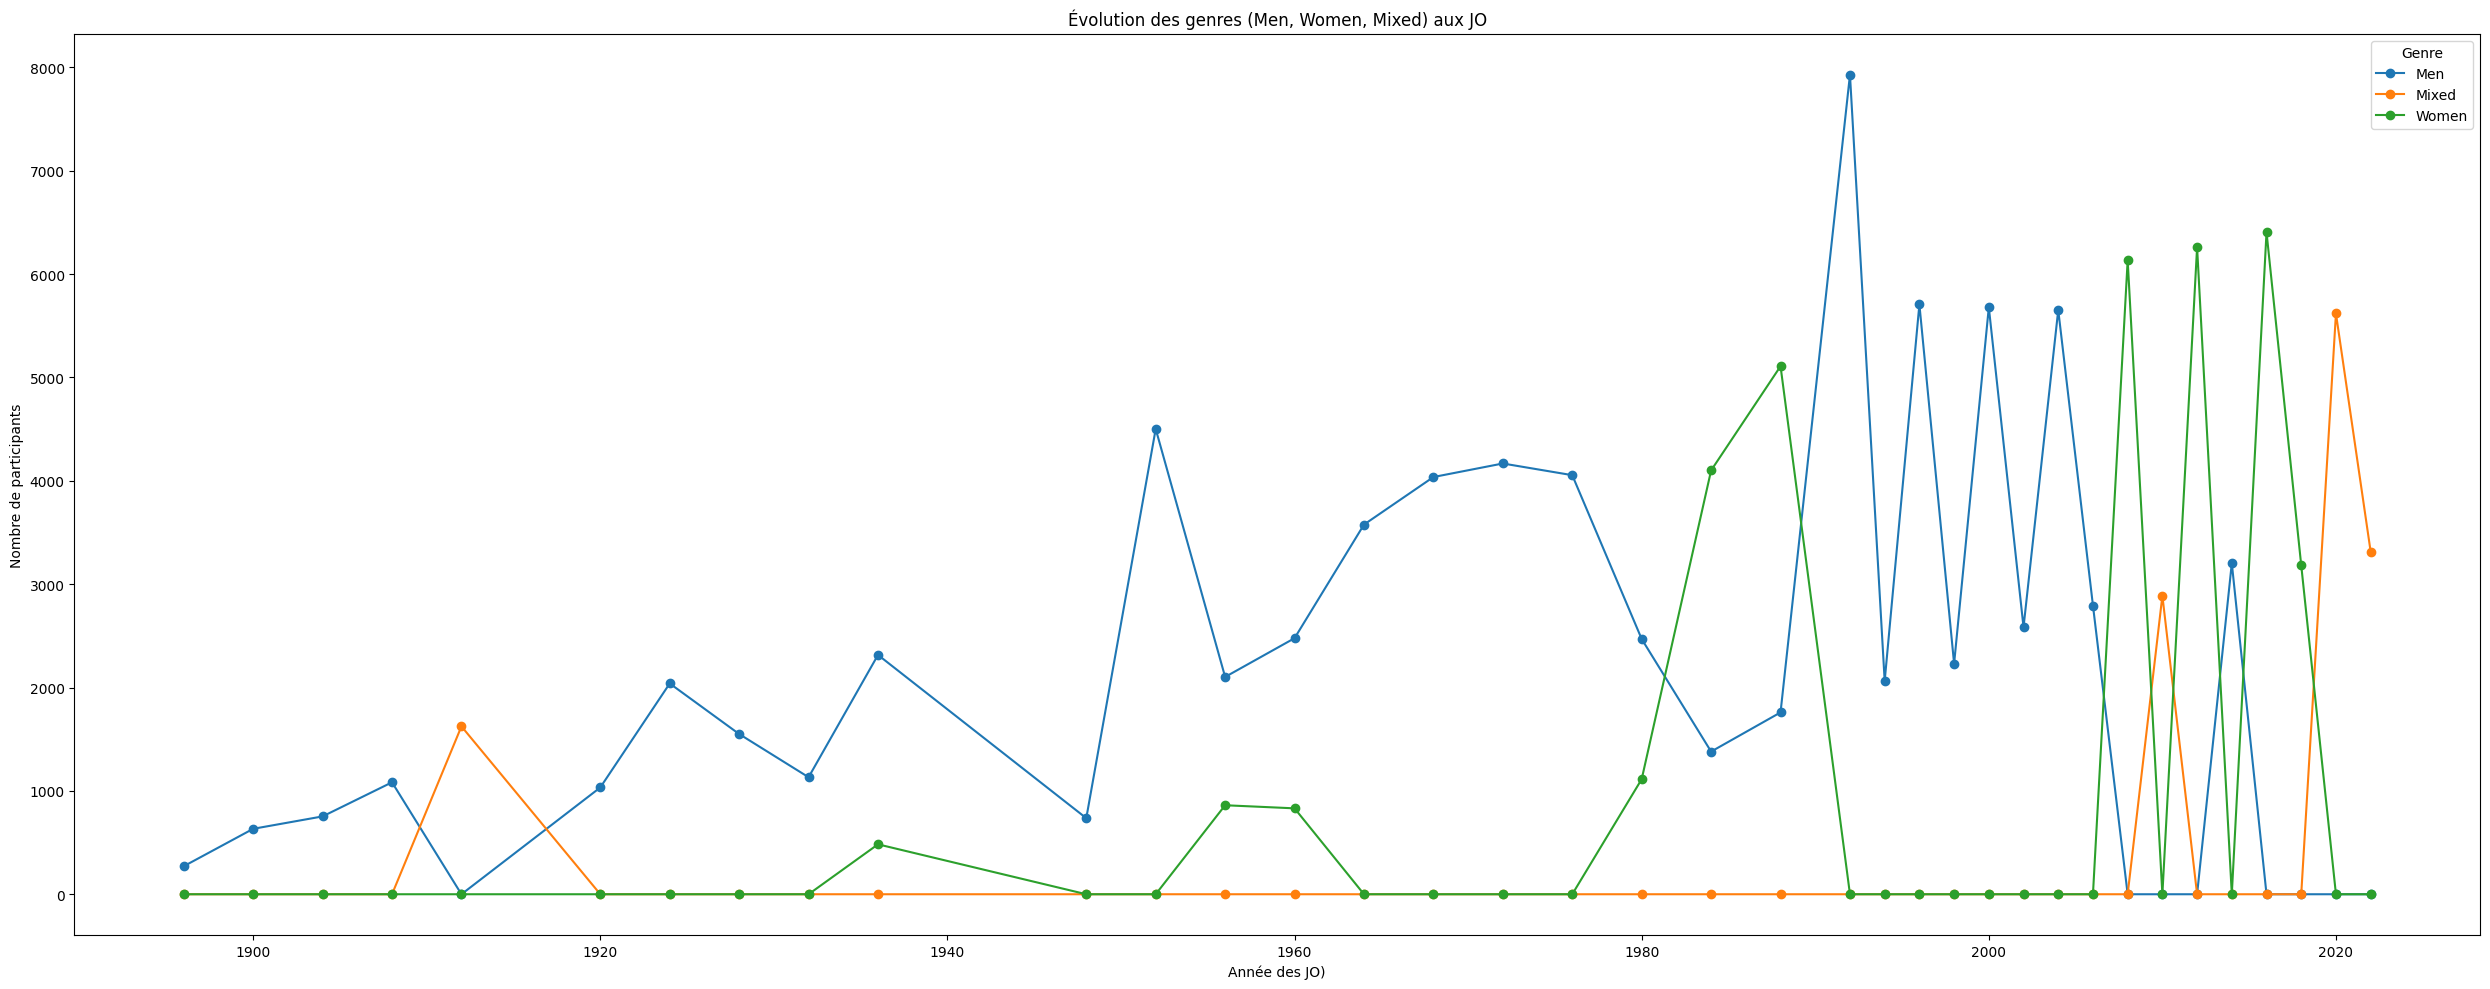

In [32]:
fig, ax = plt.subplots(figsize=(25, 10))


for gender in gender_distribution.columns:
    ax.plot(gender_distribution.index, gender_distribution[gender], marker='o', linestyle='-', label=gender)

ax.set_title("Évolution des genres (Men, Women, Mixed) aux JO")
ax.set_xlabel("Année des JO)")
ax.set_ylabel("Nombre de participants")
ax.legend(title='Genre')

plt.xticks(rotation=0)
plt.tight_layout()
plt.show()